# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
#import keras 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

C:\Users\ENVY M6\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#pip install tensorflow-gpu

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [4]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
X = data.drop(data.columns[-1], axis=1)
Y = pd.DataFrame(data[data.columns[-1]])#, columns=['labels'])

#np.array(boston_dataset.target), columns=['labels'])

In [7]:
#Y

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

C:\Users\ENVY M6\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ENVY M6\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ENVY M6\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [11]:
#X_train

In [12]:
# As it is a regression problem the output is a neuron.
output_var = 1#Y_train.shape#[0]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [13]:

# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

In [14]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, dims]) 
y = tf.placeholder(tf.float32, [None,1])

In [15]:
# Construct (linear) model
with tf.name_scope("model") as scope:
    # Set model weights
    W = tf.Variable(tf.zeros([dims, output_var]))
    b = tf.Variable(tf.zeros([output_var]))
    activation = tf.add(tf.matmul(x, W), b) # Softmax

    # Add summary ops to collect data
    w_h = tf.summary.histogram("weights_histogram", W)
    b_h = tf.summary.histogram("biases_histograms", b)
    tf.summary.scalar('mean_weights', tf.reduce_mean(W))
    tf.summary.scalar('mean_bias', tf.reduce_mean(b))

# Minimize error using cross entropy
# Note: More name scopes will clean up graph representation
with tf.name_scope("cost_function") as scope:
    cost = tf.reduce_mean(tf.square(activation-y))
    # Create a summary to monitor the cost function
    tf.summary.scalar("cost_function", cost)
    tf.summary.histogram("cost_histogram", cost)

with tf.name_scope("train") as scope:
    # Set the Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
from tensorflow import metrics as mt

Epoch: 0, Error: 0.5470128655433655
Epoch: 10, Error: 0.3545793890953064
Epoch: 20, Error: 0.2363990843296051
Epoch: 30, Error: 0.15898394584655762
Epoch: 40, Error: 0.10749787837266922
Epoch: 50, Error: 0.07313814014196396
Epoch: 60, Error: 0.050188347697257996
Epoch: 70, Error: 0.0348549522459507
Epoch: 80, Error: 0.024607952684164047
Epoch: 90, Error: 0.017758280038833618
Epoch: 100, Error: 0.013177930377423763
Epoch: 110, Error: 0.010113575495779514
Epoch: 120, Error: 0.008062100037932396
Epoch: 130, Error: 0.006687460467219353
Epoch: 140, Error: 0.005765197798609734
Training phase finished


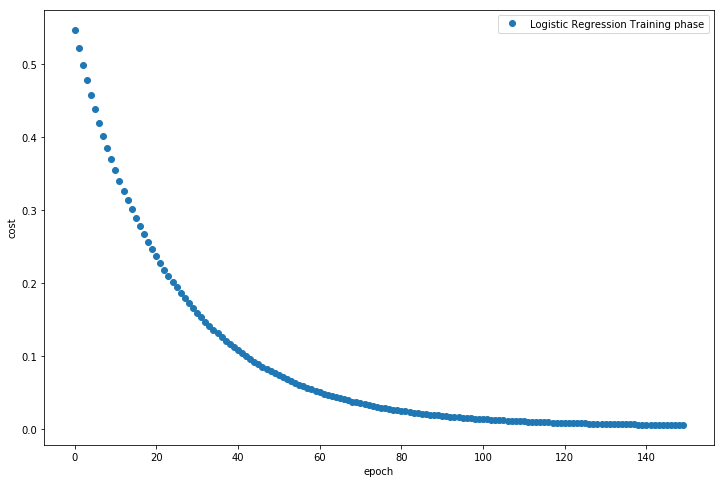

In [17]:
# Launch the graph
with tf.Session() as session:
    # Initializing the variables
    session.run(tf.global_variables_initializer())
    
    cost_epochs = []
    # Training cycle
    for epoch in range(training_epochs):
        _, c = session.run(fetches=[optimizer, cost], feed_dict={x: X_train, y: Y_train})
        cost_epochs.append(c)
        #writer.add_summary(summary=summary, global_step=epoch)
        #print("accuracy epoch {}:{}".format(epoch, accuracy.eval({x: X_train, y: Y_train})))
        
        # Print the Loss/Error after every 100 epochs
        if epoch%10 == 0:
            print('Epoch: {0}, Error: {1}'.format(epoch, c))
            
    print("Training phase finished")
    
    #plotting
    plt.figure(figsize=(12,8))
    plt.plot(range(len(cost_epochs)), cost_epochs, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    #prediction = tf.argmax(activation, 1)
    #print(prediction.eval({x: X_test}))
    

In [34]:
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping, ModelCheckpoint

In [35]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

#fBestModel = 'best_model.h5' 
#early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
#best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

#model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, 
#          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

In [38]:
dims = X_train.shape[1]
output_var = 1

In [39]:
K.clear_session()
print("Building model...")
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________


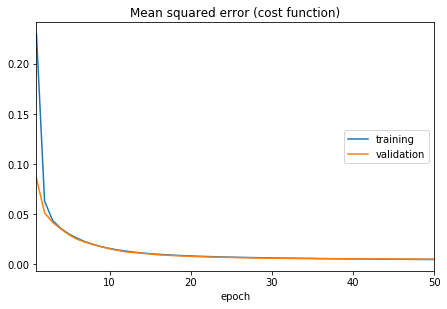

Mean squared error (cost function):
training   (min:    0.005, max:    0.230, cur:    0.005)
validation (min:    0.005, max:    0.086, cur:    0.005)


In [40]:
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

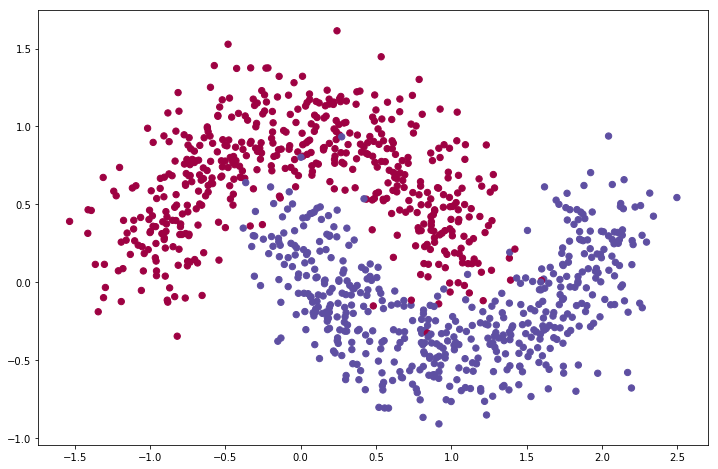

In [18]:
# Create moons dataset.
from keras.utils.np_utils import to_categorical
from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)

plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);


In [19]:
x_train

array([[ 0.55356914, -0.37596172],
       [ 0.98105873, -0.28467913],
       [ 1.87345298,  0.43682194],
       ...,
       [ 0.04851258,  0.90561169],
       [ 0.43233063, -0.45949733],
       [ 1.73748601, -0.11214153]])

In [20]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [21]:
#y_train = to_categorical(y_train)
# As it is a regression problem the output is a neuron.
#output_var = 1#Y_train.shape#[0]
#print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

2 input variables


**Hint:** Use the next function to plt the decision boundary,

In [22]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K

In [31]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
keras_model=model.fit(x_train, y_train, verbose=2,epochs=100)

Building model...
Model variables:  2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 0s - loss: 0.6852
Epoch 2/100
 - 0s - loss: 0.4184
Epoch 3/100
 - 0s - loss: 0.3213
Epoch 4/100
 - 0s - loss: 0.2666
Epoch 5/100
 - 0s - loss: 0.2284
Epoch 6/100
 - 0s - loss: 0.1992
Epoch 7/100
 - 0s - loss: 0.1771
Epoch 8/100
 - 0s - loss: 0.1598
Epoch 9/100
 - 0s - loss: 0.1464
Epoch 10/100
 - 0s - loss: 0.1358
Epoch 11/100
 - 0s - loss: 0.1272
Epoch 12/100
 - 0s - loss: 0.1205
Epoch 13/100
 - 0s - loss: 0.1151
Epoch 14/100
 - 0s - loss: 0.1108
Epoch 15/100
 - 0s - loss: 0.1075
Epoch 16/100
 - 0s - loss: 0.1047
Epoch 17/100
 - 0s - loss: 0.1025
Epoch 18/100
 - 0s - loss: 0.1009
Epoch 19/100
 - 0s - loss: 0.0

In [24]:
import matplotlib as pl

In [26]:
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

In [27]:
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

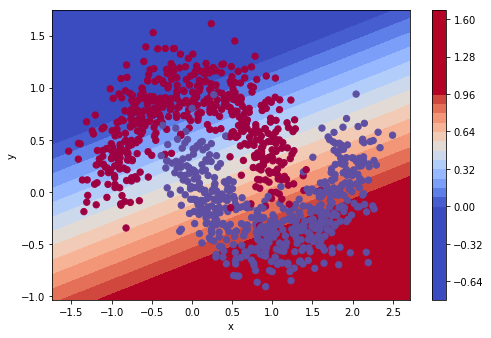

In [32]:
plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);
#plot_data(x_train, y_train)